In [1]:
import networkx as nx
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.ticker import ScalarFormatter

# Simulation function

## the function

In [2]:
def long_term_abundance(G, N, beta_set, alpha_11, alpha_12, alpha_13, alpha_21, alpha_22, alpha_23, alpha_31, alpha_32, alpha_33):
    '''
    G: network structure of an evolutionary game
    N: population size
    beta_set: selection strength
    alpha ij: payoff matrix
    '''
    ##### distribute strategies to each node #####
    # 1 represents AllC
    # 2 represents Extortionate ZD
    # 3 represents PSO Gambler
    ##############################################
    
    # make the strategies of all nodes AllC
    node_strategies = {}
    for node in G.nodes():
        strategy = random.choice(['1', '1'])
        node_strategies[node] = strategy
    
    # initializes the number of nodes for each strategy
    n = N
    AllC_count = sum(1 for node in G.nodes() if  node_strategies[node] == '1')
    ZD_count = sum(1 for node in G.nodes() if  node_strategies[node] == '2')
    PSO_count = n - AllC_count - ZD_count
    
    node_strategies1 = node_strategies.copy()
    AllC_count1 = AllC_count
    ZD_count1 = ZD_count
    PSO_count1 = PSO_count
    
    # set counter
    update_round = 0
    cal1 = 0
    cal2 = 0
    cal3 = 0
    AllC_round = [0]*10000000
    ZD_round = [0]*10000000
    PSO_round = [0]*10000000
    
    # update 10000000 rounds
    while update_round < 10000000:
        # select a node random
        selected_node = random.choice(list(G.nodes()))
        # calculate the fitness of all neighbors of the focal point
        sum_AllC = 0
        sum_ZD = 0
        sum_PSO = 0
        for neighbor in G.neighbors(selected_node):
            # find the distribution of neighbors of neighbors
            neighbor_AllC = 0
            neighbor_ZD = 0
            neighbor_PSO = 0
            for neighbor_neighbor in G.neighbors(neighbor):
                if node_strategies1[neighbor_neighbor] == '1':
                    neighbor_AllC += 1
                elif node_strategies1[neighbor_neighbor] == '2':
                    neighbor_ZD += 1
                else:
                    neighbor_PSO += 1
            # calculate the fitness of neighbors
            beta = beta_set
            if node_strategies1[neighbor] == '1':
                sum_AllC += math.exp(beta*(alpha_11*neighbor_AllC + alpha_12*neighbor_ZD + alpha_13*neighbor_PSO))
            elif node_strategies1[neighbor] == '2':
                sum_ZD += math.exp(beta*(alpha_21*neighbor_AllC + alpha_22*neighbor_ZD + alpha_23*neighbor_PSO))
            else:
                sum_PSO += math.exp(beta*(alpha_31*neighbor_AllC + alpha_32*neighbor_ZD + alpha_33*neighbor_PSO))
        
        # the probability of change if the selected node does not mutate
        p_ZD = sum_ZD / (sum_AllC + sum_ZD + sum_PSO)
        p_PSO = sum_PSO / (sum_AllC + sum_ZD + sum_PSO)
        p_AllC = sum_AllC / (sum_AllC + sum_ZD + sum_PSO)
        
        ########## update the selected node ##########
        
        # mutation rate
        mutation_rate=0.0005
        
        if random.uniform(0, 1) < mutation_rate: # do mutate
            change_strategy = random.choice(['1', '2', '3']) # randomly select a strategy to mutate
            
            if node_strategies1[selected_node] == '1': # original strategy is AllC
                if change_strategy == '1': # mutate to AllC
                    node_strategies1[selected_node] = change_strategy
                elif change_strategy == '2': # mutate to ZD Extrotioner
                    node_strategies1[selected_node] = change_strategy
                    AllC_count1 -= 1
                    ZD_count1 += 1
                else: # mutate to PSO Gambler
                    node_strategies1[selected_node] = change_strategy
                    AllC_count1 -= 1
                    PSO_count1 += 1
                    
            elif node_strategies1[selected_node] == '2': # original strategy is Extortionate ZD
                if change_strategy == '1': # mutate to AllC
                    node_strategies1[selected_node] = change_strategy
                    ZD_count1 -= 1
                    AllC_count1 += 1
                elif change_strategy == '2': # mutate to ZD Extrotioner
                    node_strategies1[selected_node] = change_strategy
                else: # mutate to PSO Gambler
                    node_strategies1[selected_node] = change_strategy
                    ZD_count1 -= 1
                    PSO_count1 += 1
            else: #  original strategy is PSO Gambler
                if change_strategy == '1': # mutate to AllC
                    node_strategies1[selected_node] = change_strategy
                    PSO_count1 -= 1
                    AllC_count1 += 1
                elif change_strategy == '2': # mutate to ZD Extrotioner
                    node_strategies1[selected_node] = change_strategy
                    PSO_count1 -= 1
                    ZD_count1 += 1
                else: # mutate to PSO Gambler
                    node_strategies1[selected_node] = change_strategy
                    
        else: # do not mutate
            if node_strategies1[selected_node] == '1': # original strategy is AllC
                update_prob_1 = random.uniform(0, 1)
                if update_prob_1 < p_ZD: # change to ZD Extorioner
                    node_strategies1[selected_node] = '2'
                    AllC_count1 -= 1
                    ZD_count1 += 1
                elif update_prob_1 < p_ZD + p_PSO: # change to PSO Gambler
                    node_strategies1[selected_node] = '3'
                    AllC_count1 -= 1
                    PSO_count1 += 1
                else: # do not change
                    node_strategies1[selected_node] = '1'
                    
            elif node_strategies1[selected_node] == '2': # original strategy is ZD Extorioner
                update_prob_2 = random.uniform(0, 1)
                if update_prob_2 < p_AllC: # change to AllC
                    node_strategies1[selected_node] = '1'
                    ZD_count1 -= 1
                    AllC_count1 += 1
                elif update_prob_2 < p_AllC + p_PSO: # change to PSO Gambler
                    node_strategies1[selected_node] = '3'
                    ZD_count1 -= 1
                    PSO_count1 += 1
                else: # do not change
                    node_strategies1[selected_node] = '2'
                    
            else: # original strategy is PSO Gambler
                update_prob_3 = random.uniform(0, 1)
                if update_prob_3 < p_AllC: # change to AllC
                    node_strategies1[selected_node] = '1'
                    PSO_count1 -= 1
                    AllC_count1 += 1
                elif update_prob_3 < p_AllC + p_ZD: # change to Extortionate ZD
                    node_strategies1[selected_node] = '2'
                    PSO_count1 -= 1
                    ZD_count1 += 1
                else: # do not change
                    node_strategies1[selected_node] = '3'
                    
        # record the population structure for each round
        AllC_round[update_round] = AllC_count1 / (AllC_count1 + ZD_count1 + PSO_count1)
        ZD_round[update_round] = ZD_count1 / (AllC_count1 + ZD_count1 + PSO_count1)
        PSO_round[update_round] = PSO_count1 / (AllC_count1 + ZD_count1 + PSO_count1)
        
        update_round += 1
        cal1 += AllC_count1
        cal2 += ZD_count1
        cal3 += PSO_count1

    # the result of long-term abundances
    fre_1 = cal1 / (cal1 + cal2 + cal3) # long-term abundance of AllC
    fre_2 = cal2 / (cal1 + cal2 + cal3) # long-term abundance of Extortionate ZD
    fre_3 = cal3 / (cal1 + cal2 + cal3) # long-term abundance of PSO Gambler
    
    # print the result
    #print("the long-term abundance of AllC = ", fre_1)
    #print("the long-term abundance of ZD = ", fre_2)
    #print("the long-term abundance of PSO Gambler = ", fre_3)
    
    # return the result (long-term abundance and population structure)
    return fre_1, fre_2, fre_3, AllC_round, ZD_round, PSO_round

# Initialize a lattice ($N = 100$)

In [3]:
G = nx.grid_2d_graph(10, 10)

# Simulation of different $\chi$ with $\beta = 0.001$
The calculation result of the payoff matrix is referred to the "Theoretical part"

## The example $\chi = 1$

$\chi = 1 \Rightarrow \alpha_{ij} = 3$

In [26]:
lambda1_1, lambda2_1, lambda3_1, AllC_round_1, ZD_round_1, PSO_round_1 = long_term_abundance(G, 100, 0.001, 3, 3, 3, 3, 3, 3, 3, 3, 3)

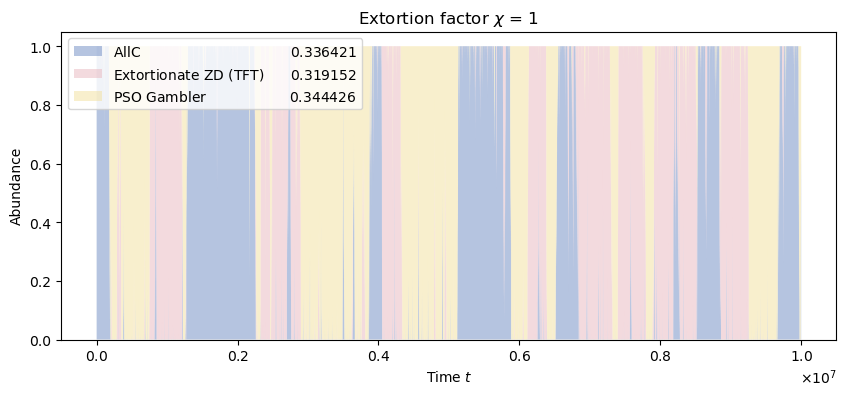

In [44]:
t = range(10000000)

population_by_continent = {
    'AllC                                  ${:.6f}$'.format(lambda1_1): AllC_round_1,
    'Extortionate ZD (TFT)      ${:.6f}$'.format(lambda2_1): ZD_round_1,
    'PSO Gambler                   ${:.6f}$'.format(lambda3_1): PSO_round_1,
}

fig, ax = plt.subplots()

# size of figure
fig.set_size_inches(10, 4)

colors = ['#6D8BC3', '#E9B6BE', '#F3E19C']
ax.stackplot(t, population_by_continent.values(),
             labels=population_by_continent.keys(),
             colors=colors,
             alpha=0.5)
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax.legend(loc='upper left')

for text in ax.get_legend().get_texts():
    text.set_ha('left')

ax.set_title(r'Extortion factor $\chi$ = 1')
ax.set_xlabel(r'Time $t$')
ax.set_ylabel('Abundance')

# save the figure
#plt.savefig('Population Structure of a 3-strategy Evolutionary Game on Lattice (chi = 1).png', format='png', dpi = 900)

plt.show()


## The example $\chi = 4$

$\chi=4\Rightarrow\left\{\begin{matrix}\alpha_{11} = \alpha_{13} = \alpha_{31} = \alpha_{33} = 3,\alpha_{22} = 1,\\\alpha_{12} = 12/7,\alpha_{21} = 27/7 ,\\\alpha_{23} = 1.87720645087564 ,\\ \alpha_{32} = 1.21930161271891.\end{matrix}\right.$

In [4]:
lambda1_4, lambda2_4, lambda3_4, AllC_round_4, ZD_round_4, PSO_round_4 = long_term_abundance(G, 100, 0.001, 3, 12/7, 3, 27/7, 1, 1.87720645087564, 3, 1.21930161271891, 3)

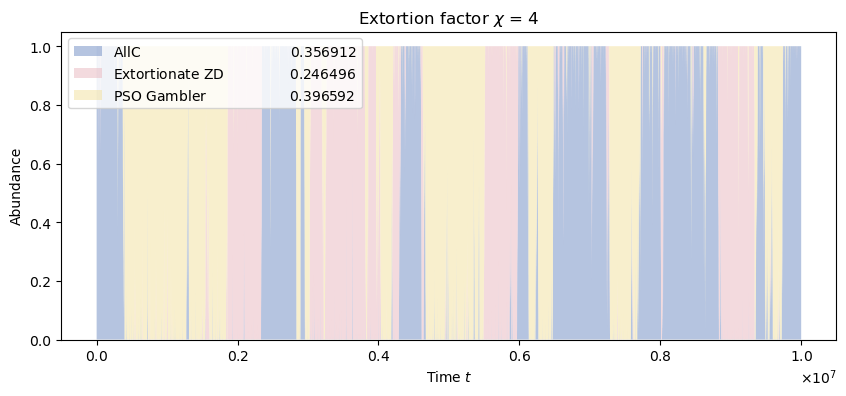

In [10]:
t = range(10000000)

population_by_continent = {
    'AllC                                  ${:.6f}$'.format(lambda1_4): AllC_round_4,
    'Extortionate ZD               ${:.6f}$'.format(lambda2_4): ZD_round_4,
    'PSO Gambler                   ${:.6f}$'.format(lambda3_4): PSO_round_4,
}

fig, ax = plt.subplots()

# size of figure
fig.set_size_inches(10, 4)

colors = ['#6D8BC3', '#E9B6BE', '#F3E19C']
ax.stackplot(t, population_by_continent.values(),
             labels=population_by_continent.keys(),
             colors=colors,
             alpha=0.5)
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

ax.legend(loc='upper left')

for text in ax.get_legend().get_texts():
    text.set_ha('left')

ax.set_title(r'Extortion factor $\chi$ = 4')
ax.set_xlabel(r'Time $t$')
ax.set_ylabel('Abundance')

# save the figure
#plt.savefig('Population Structure of a 3-strategy Evolutionary Game on Lattice (chi = 4).png', format='png', dpi = 900)

plt.show()


# Comparison between simulation results and function images
Combining the final calculated payoff matrixes from the "Compute_and_simplify.ipynb" and using the simulation function "long_term_abundance()" above, repeat 8 times for each different chi and average the results of the 8 times to finally get the result arrays. The results are in the file "Data_1.xlsx" 

## the result arrays ↓

In [45]:
AllC = [0.38055992680, 0.3666788205, 0.3597314899, 0.3567500563, 0.3516662871, 0.35163425440,
        0.35337454575, 0.3555010763, 0.3515112810, 0.3510901903, 0.3503282449, 0.35452069555,
        0.34977464535, 0.34141985845, 0.34139489805, 0.3429218110, 0.35122467165, 0.35080157940, 0.34404117940]

ZD = [0.22933322135, 0.2352766377, 0.2405231673, 0.25141430045, 0.2555951301, 0.25270007265,
      0.24927893915, 0.2529679130, 0.2548933202, 0.25580263270, 0.2593622609, 0.25285494805,
      0.25207010095, 0.26310429300, 0.25874670270, 0.2606450767, 0.25214071470, 0.25210532185, 0.25718796935]

PSO = [0.39010685185, 0.39804454184, 0.39974534280, 0.39183564325, 0.39273858280, 0.39566567295,
       0.39734652510, 0.39153101070, 0.39359539880, 0.39310717700, 0.39030949420, 0.39262435640,
       0.39815525370, 0.39547584855, 0.39985614925, 0.39643311230, 0.39663461365, 0.39709309875, 0.39877085125]

## painting function ↓

In [48]:
def paint_comparison(p1, p2, p3):
    '''
    p1: the array of simulation results of long-term abundance of AllC with different chi
    p2: the array of simulation results of long-term abundance of Extortionate ZD with different chi
    p3: the array of simulation results of long-term abundance of PSO Gambler with different chi
    '''
    
    # size of figure
    plt.figure(figsize=(12, 6))
    
    # scatter plots
    z = [1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5]
    
    plt.scatter(z, p1, s=60, marker='^', edgecolors='#6D8BC3', facecolors='#6D8BC3', zorder=18)
    plt.scatter(z, p2, s=60, marker='^', edgecolors='#E9B6BE', facecolors='#E9B6BE', zorder=19)
    plt.scatter(z, p3, s=60, marker='^', edgecolors='#F3E19C', facecolors='#F3E19C', zorder=20)
    
    
    ### The following part is identical to the "Plot the function images of fixation probabilities" in "Compute_and_simplify" ###
    x = np.linspace(1, 20, 100000)
    
    y1 = -(4.49726233156984*x**3 + 2.68590913537835*x**2 - 3.11317031657329*x - 1.18897071999626)/(3*(-4.50655997677753*x**3 - 1.20760596881118*x**2 + 2.48101898478848*x + 0.813081399282176))
    y2 = (-3.74415306974691*x**3 + 0.565174340912924*x**2 + 1.42345389906067*x + 0.25738900597642)/(3*(-4.50655997677753*x**3 - 1.20760596881118*x**2 + 2.48101898478848*x + 0.813081399282176))
    y3 = -(5.27826452901584*x**3 + 1.50208311196812*x**2 - 2.90643273873147*x - 0.99288447187385)/(3*(-4.50655997677753*x**3 - 1.20760596881118*x**2 + 2.48101898478848*x + 0.813081399282176))
    y4 = (28*x + 34.5)/(56*x + 39)
    y5 = (28*x + 4.5)/(56*x + 39)
    
    x0 = 1
    y0 = 1/3
    plt.scatter(x0, y0, s = 130, color = '#F3E19C', zorder=13)
    plt.scatter(x0, y0, s = 70, color = '#E9B6BE', zorder=14)
    plt.scatter(x0, y0, s = 30, color = '#6D8BC3', zorder=15)
    
    x_0 = 1
    y_0 = 1/2
    plt.scatter(x_0, y_0, s = 70, color = '#6D8BC3', zorder=16)
    plt.scatter(x_0, y_0, s = 30, color = '#E9B6BE', zorder=17)
    
    plt.plot(x, y1, color='#6D8BC3', label = 'AllC', linewidth=2, zorder=3)
    plt.plot(x, y2, color='#E9B6BE', label = 'Extortionate ZD', linewidth=2, zorder=4)
    plt.plot(x, y3, color='#F3E19C', label = 'PSO Gambler', linewidth=2, zorder=5)
    plt.plot(x, y4, color='#6D8BC3', label = 'AllC', linestyle='--', linewidth=2, zorder=6)
    plt.plot(x, y5, color='#E9B6BE', label = 'Extortionate ZD', linestyle='--', linewidth=2, zorder=7)
    
    plt.scatter(1, 0.39682539682539736, s=100, facecolors='w', edgecolors='#6D8BC3', zorder=8)
    plt.scatter(1, 0.20634920634920711, s=100, facecolors='w', edgecolors='#E9B6BE', zorder=9)
    plt.scatter(1, 0.39682539682539747, s=70, facecolors='w', edgecolors='#F3E19C', zorder=10)
    plt.scatter(1, 0.657894736842105, s=100, facecolors='w', edgecolors='#6D8BC3', zorder=11)
    plt.scatter(1, 0.342105263157894, s=100, facecolors='w', edgecolors='#E9B6BE', zorder=12)
    
    plt.xlim(0.7, 11)
    plt.ylim(0.15, 0.7)
    
    plt.xlabel(r'Extortion factor $\chi$')
    plt.ylabel('Abundance')
    
    plt.axvline(x = 1, color = 'black', linestyle='--',linewidth=1)
    
    plt.text(1.45, y0,'(1, 1/3)', ha='center', va='bottom', fontsize=12)
    plt.text(1.45, y_0,'(1, 1/2)', ha='center', va='bottom', fontsize=12)
    plt.text(1.05, 0.56,r'$\chi$ = 1', fontsize=12)
    
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey', zorder=1)
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgrey', zorder=2)
    
    plt.tick_params(axis='both', which='major', labelsize=10)
    
    
    plt.legend(loc = 'upper right')
    
    # save the figure
    #plt.savefig('Long-term abundances of an Evolutionary Game on Lattice.svg', format='svg')
    #plt.savefig('Long-term abundances of an Evolutionary Game on Lattice.png', format='png', dpi = 900)
    
    plt.show()

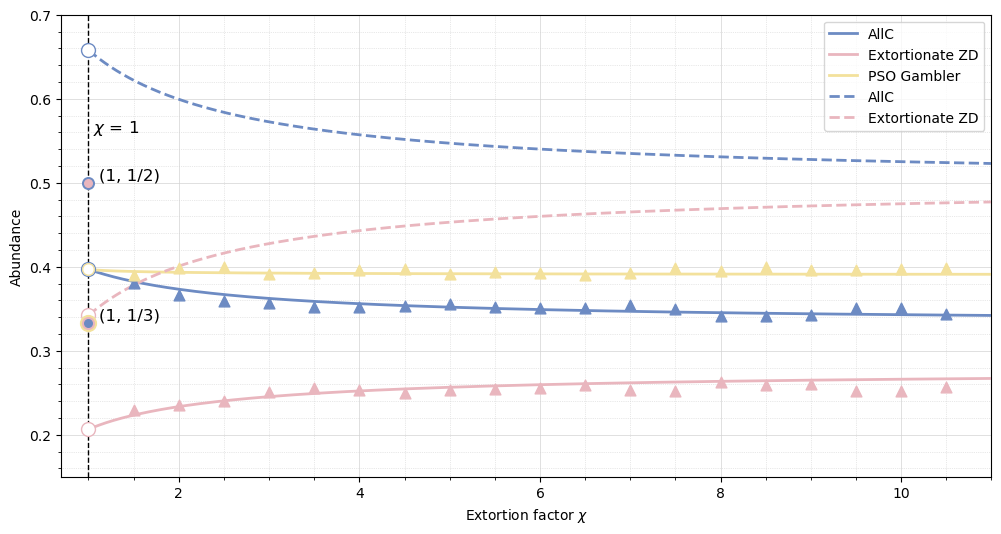

In [49]:
paint_comparison(AllC, ZD, PSO)